# Alex AI/ML Training V3

Testing approach from https://www.sciencedirect.com/science/article/pii/S0021929018304354
Estimation of vertical ground reaction force during running using neural network model and uniaxial accelerometer



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2024-12-03 13:52:08.281542: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 13:52:08.291546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733226728.302990 1802622 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733226728.306055 1802622 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 13:52:08.318245: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2760066563595435853
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1549467648
locality {
  bus_id: 1
  links {
  }
}
incarnation: 838755293896589655
physical_device_desc: "device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


I0000 00:00:1733226729.804873 1802622 gpu_device.cc:2022] Created device /device:GPU:0 with 1477 MB memory:  -> device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
#directory path
dir_path = "/home/alexbeat/data/kuopio-gait-dataset-ml"
results_dir = "results"
input_path = f"{dir_path}/_main-input.csv"
output_path = f"{dir_path}/_main-output.csv"

In [4]:
x_og = pd.read_csv(input_path, index_col=0)  # 49 input features
y_og = pd.read_csv(output_path, index_col=0)   # 3 output features (x, y, z)

x_og.drop(columns=['time'], inplace=True)
y_og.drop(columns=['time'], inplace=True)


num_rows = 200000
x = x_og[:num_rows]
y = y_og[:num_rows]

In [5]:
print(x.head())

   pelvis_imu_acc_0  pelvis_imu_acc_1  pelvis_imu_acc_2  tibia_r_imu_acc_0  \
0          9.761505         -0.539103          1.818704          12.697140   
1         10.134969         -0.911804          1.594711          10.897347   
2         10.385214         -1.351347          1.155096           9.525765   
3         10.543116         -1.864298          0.684864           9.072569   
4         10.660259         -2.339200          0.291542           9.549234   

   tibia_r_imu_acc_1  tibia_r_imu_acc_2  femur_r_imu_acc_0  femur_r_imu_acc_1  \
0          16.125368           6.755737           6.553590          -9.642062   
1          16.414892           6.965524           7.794528          -8.131455   
2          14.627335           5.945245           8.543280          -7.183258   
3          11.909804           4.448972           8.545444          -6.877351   
4          10.364927           3.148921           7.764376          -6.626254   

   femur_r_imu_acc_2  tibia_l_imu_acc_0  ...

In [6]:
print(y_og.head())
print(y.head())

       f2_1      f2_2       f2_3
0 -0.678967  0.748046  -7.150059
1 -0.721937  1.238132  -9.194256
2 -0.582924  1.809044 -10.333972
3 -0.132954  2.361078  -9.370096
4  0.781994  2.707438  -4.607854
       f2_1      f2_2       f2_3
0 -0.678967  0.748046  -7.150059
1 -0.721937  1.238132  -9.194256
2 -0.582924  1.809044 -10.333972
3 -0.132954  2.361078  -9.370096
4  0.781994  2.707438  -4.607854


In [7]:
scalerX = StandardScaler()
X = scalerX.fit_transform(x)

Y = y
# scalerY = StandardScaler()
# Y = scalerY.fit_transform(y)
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (200000, 49)
Y shape: (200000, 3)


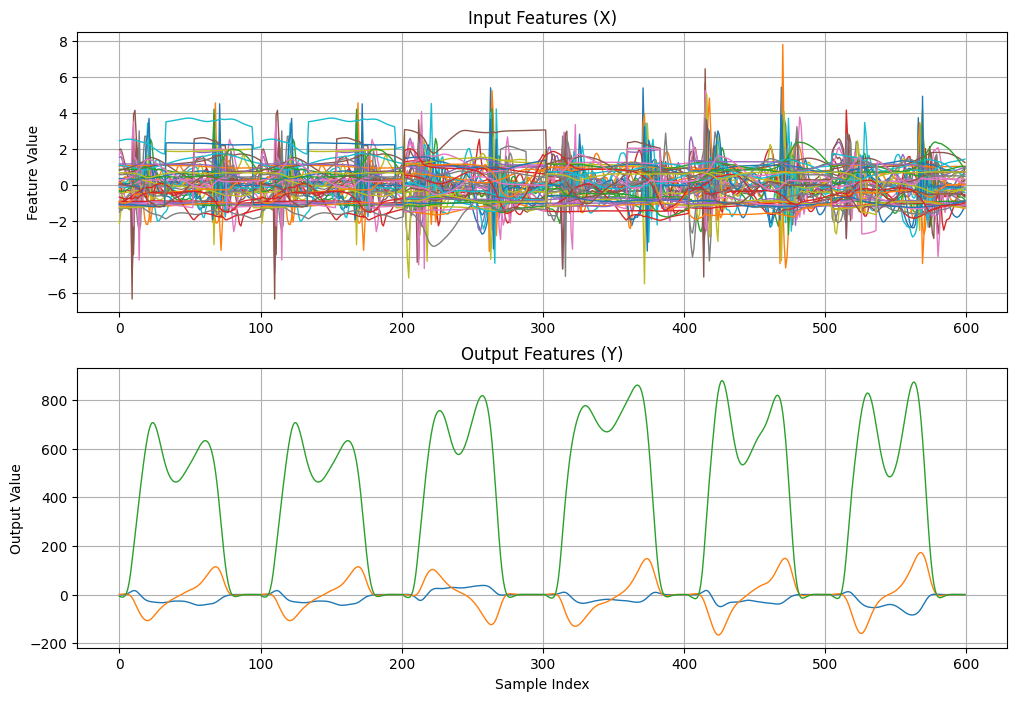

In [8]:
# Create a figure
plt.figure(figsize=(12, 8))

graph_window = 600
# Plotting the input features (X)
plt.subplot(2, 1, 1)
for i in range(X.shape[1]):  # Loop through each feature (column)
    plt.plot(X[:graph_window, i], label=f'Feature {i+1}', linewidth=1)
plt.title('Input Features (X)')
# plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
# plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

# Plotting the output features (y)
plt.subplot(2, 1, 2)
for i in range(Y.shape[1]):  # Loop through each output feature (column)
    plt.plot(Y.iloc[:graph_window, i], label=f'Output {i+1}', linewidth=1)
plt.title('Output Features (Y)')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
# plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

plt.savefig(os.path.join(results_dir,f'input_output_features_{graph_window}.eps'), format='eps')  # Save as EPS
plt.show()

In [9]:
model = Sequential()

model.add(Input(shape=(49,)))  # Using Input layer

# Input layer and first hidden layer
model.add(Dense(256, activation='sigmoid'))

# Second hidden layer
model.add(Dense(512, activation='relu'))

# Output layer
model.add(Dense(3, activation='linear'))  # Linear activation for regression

I0000 00:00:1733226731.331693 1802622 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1477 MB memory:  -> device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [10]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,923 (570.01 KB)

 Trainable params: 145,923 (570.01 KB)

 Non-trainable params: 0 (0.00 B)

None


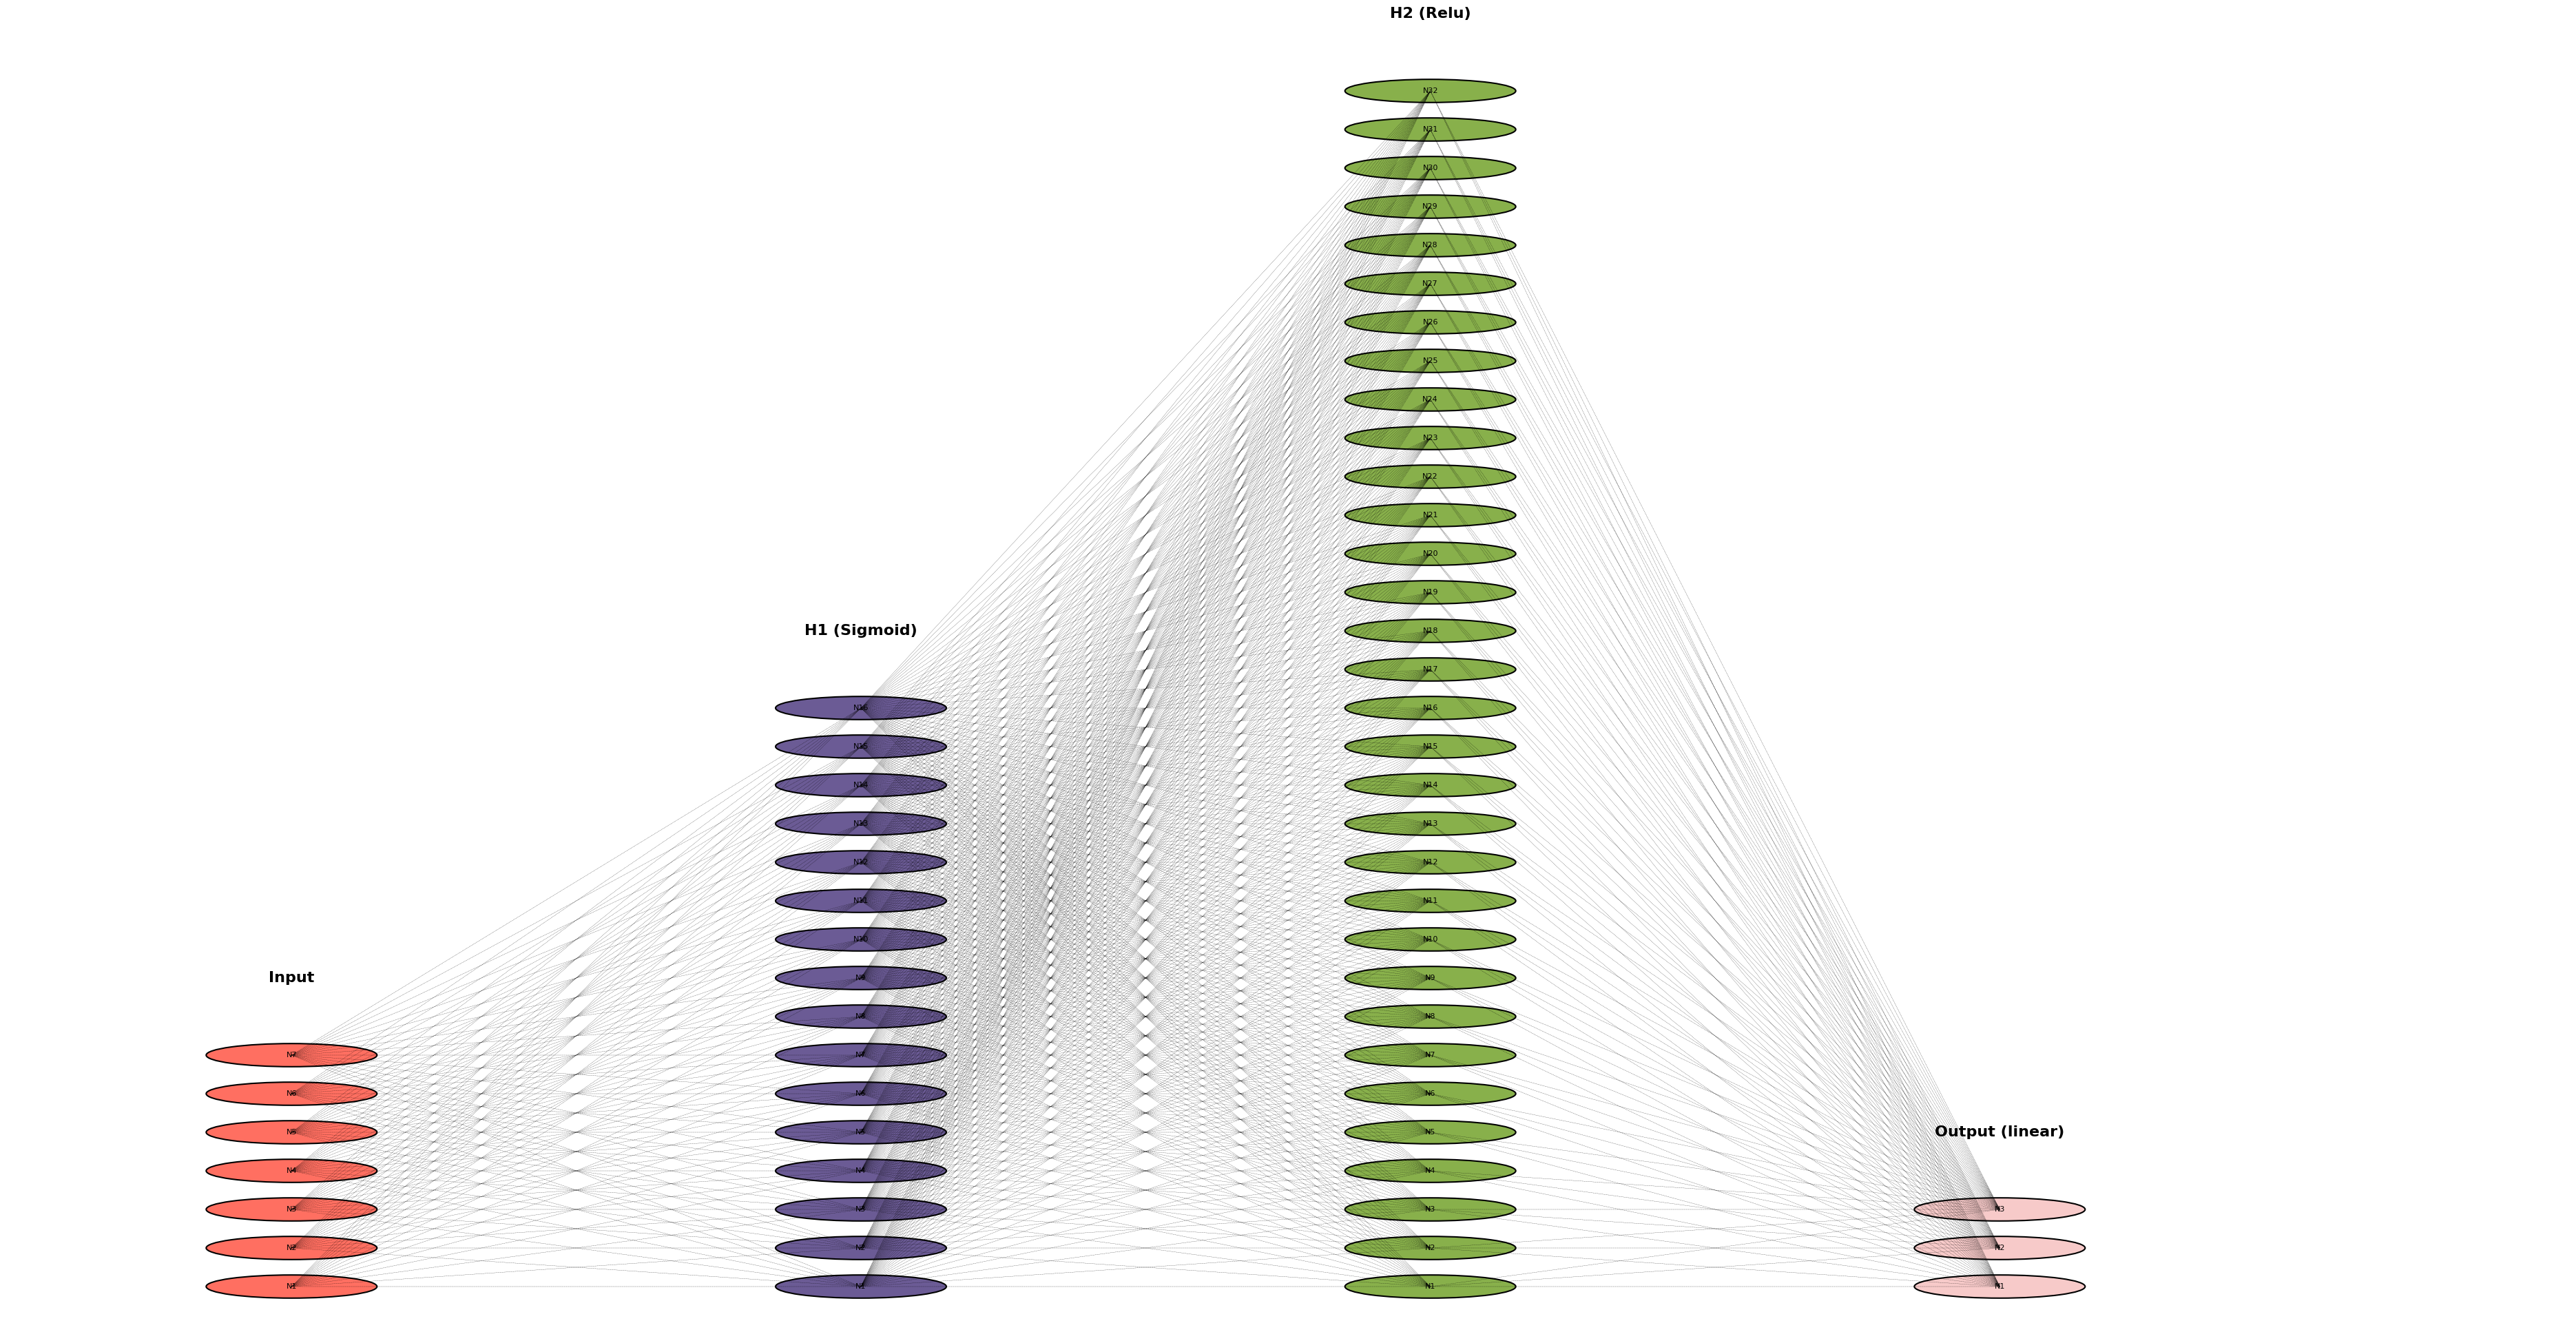

In [13]:
def draw_neural_net(ax, layer_sizes, layer_names):
    # Define vibrant colors for different layers
    colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']  # Brighter colors
    
    # Loop through each layer
    for n, (layer_size, color, layer_name) in enumerate(zip(layer_sizes, colors, layer_names)):
        # Calculate the x position for the layer
        x = n * 2  # Spacing between layers
        
        # Calculate the y positions for the neurons in this layer
        y = np.linspace(1, layer_size, layer_size)
        
        # Draw the neurons
        for i in range(layer_size):
            circle = plt.Circle((x, y[i]), 0.3, color=color, ec='black', lw=1.5)
            ax.add_artist(circle)
            # Add the neuron label
            ax.text(x, y[i], f'N{i+1}', horizontalalignment='center', verticalalignment='center', fontsize=8)

        # Add the activation function header
        ax.text(x, layer_size + 2, f'{layer_name}', 
                horizontalalignment='center', verticalalignment='center', fontsize=16, fontweight='bold')

        # Draw connections to the next layer
        if n < len(layer_sizes) - 1:
            next_layer_size = layer_sizes[n + 1]
            for i in range(layer_size):
                for j in range(next_layer_size):
                    ax.plot([x, x + 2], [y[i], np.linspace(1, next_layer_size, next_layer_size)[j]], 'k--', lw=0.2)

# Define the layer sizes and names
scale_down = 16
layer_sizes = [int(49/7), int(256/scale_down),int(512/scale_down), 3]  # Input layer, 1st hidden layer, 2nd hidden layer, output layer
layer_names = ['Input', 'H1 (Sigmoid)', 'H2 (Relu)', 'Output (linear)']


# Create the figure
fig, ax = plt.subplots(figsize=(48, 24))
ax.set_xlim(-1, len(layer_sizes) * 2)  # Set x limits
ax.set_ylim(0, max(layer_sizes) + 1)  # Set y limits
ax.axis('off')  # Turn off the axis

# Draw the neural network
draw_neural_net(ax, layer_sizes, layer_names)

# Add title
# plt.title('Keras Model Architecture', fontsize=16, fontweight='bold')
plt.savefig(os.path.join(results_dir,f'model_architecture_flow_chart.eps'), format='eps')  # Save as EPS
plt.show()

Model architecture diagram saved as 'model_architecture.png'


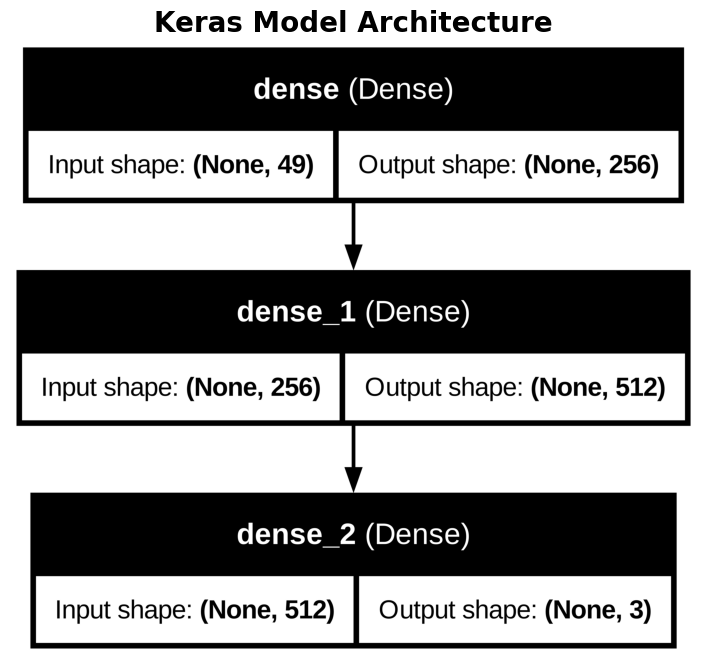

In [14]:
# Generate a diagram of the model architecture

arcitecture_image_path = os.path.join(results_dir,'model_architecture.png')
plot_model(model, to_file=arcitecture_image_path, show_shapes=True, show_layer_names=True, dpi=600)
print("Model architecture diagram saved as 'model_architecture.png'")
# Load and display the saved model architecture image

img = mpimg.imread(arcitecture_image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title('Keras Model Architecture', fontsize=20, fontweight='bold')
plt.show()

In [23]:
model.fit(X, Y, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - loss: 2855.4133 - mae: 24.3593 - val_loss: 7467.9888 - val_mae: 32.7104
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2799.2815 - mae: 24.0394 - val_loss: 7704.7183 - val_mae: 33.8343
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - loss: 2699.1155 - mae: 23.7160 - val_loss: 7402.2544 - val_mae: 33.0866
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - loss: 2686.5974 - mae: 23.6615 - val_loss: 7532.6514 - val_mae: 32.7523
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - loss: 2639.1682 - mae: 23.5354 - val_loss: 7296.5352 - val_mae: 32.4622
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 997us/step - loss: 2605.1436 - mae: 23.4216 - val_loss: 7372.2241 - val_mae: 32.8139
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - loss: 2572.3589 - mae: 23.2596 - val_loss: 7330.5498 - val_mae: 32.7419
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - loss: 2555.7180 - mae: 23.2163 - v

In [25]:
x_text_path = f"{dir_path}/input/01-l_comf_01-input.csv"
y_text_path = f"{dir_path}/output/01-l_comf_01-output.csv"
X_test = pd.read_csv(x_text_path, index_col=0)  # 49 input features
y_test = pd.read_csv(y_text_path, index_col=0)   # 3 output features (x, y, z)
X_test.drop(columns=['time'], inplace=True)
y_test.drop(columns=['time'], inplace=True)

# Normalize test data
X_test = scalerX.transform(X_test)
# y_test = scalerY.transform(y_test)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 82755.0703 - mae: 159.5627  
Test Loss: 69237.8515625, Test MAE: 135.4897918701172


In [26]:
predictions = model.predict(X_test)
print(predictions)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[-14.896492  -13.788606  547.905    ]
 [-15.06152   -13.4928665 547.71246  ]
 [-15.150158  -13.296347  547.3596   ]
 ...
 [-10.314286   -5.345976  367.40796  ]
 [-10.323381   -4.797547  378.0155   ]
 [-10.341497   -5.273192  386.77072  ]]


In [27]:
from OneEuroFilter import OneEuroFilter

def apply_one_euro_filter(nd_array, config):
    num_rows, num_cols = nd_array.shape
    filtered_array = np.zeros_like(nd_array)  # Create an array to hold filtered values
    f = OneEuroFilter(**config)
    # Define a helper function to filter a single column
    def filter_column(col_index):
        return np.array([f(nd_array[row, col_index], row) for row in range(num_rows)])

    # Apply the filter to each column using map
    filtered_array = np.column_stack(list(map(filter_column, range(num_cols))))

    return filtered_array

In [28]:
# Iterative way for reference
# from OneEuroFilter import OneEuroFilter

# def apply_one_euro_filter(nd_array, config):
#     num_rows, num_cols = nd_array.shape
#     filtered_array = np.zeros_like(nd_array)  # Create an array to hold filtered values
#     f = OneEuroFilter(**config)
#     for col in range(num_cols):
#         for row in range(num_rows):
#             current_time = row  # Assuming each row corresponds to a time step
#             # First parameter is the value to filter
#             # the second parameter is the current timestamp in seconds
#             filtered_array[row, col] = f(nd_array[row, col], current_time)
#             # filtered_array[row, col] = one_euro_filter.filter(nd_array[row, col], current_time)

#     return filtered_array


In [29]:
# Apply the One Euro Filter to all columns except 'time'
config = {
    'freq': 12,       # Hz
    'mincutoff': 0.001,  # Hz
    'beta': 1.0,       
    'dcutoff': 1.0  
    }
# freq = 12 # Frequency in Hz
# min_cutoff = 0.04
# beta = 0.7
# derivative_cutoff = 1.0
predictions_filtered = apply_one_euro_filter(predictions, config)

# Print the smoothed DataFrame
print(predictions_filtered)

[[-14.896492  -13.614033  547.7206   ]
 [-14.939896  -13.533779  547.71246  ]
 [-15.073227  -13.413608  547.36597  ]
 ...
 [-10.223771   -5.4414644 367.2593   ]
 [-10.266206   -4.9322786 377.85007  ]
 [-10.291815   -5.127263  386.6173   ]]


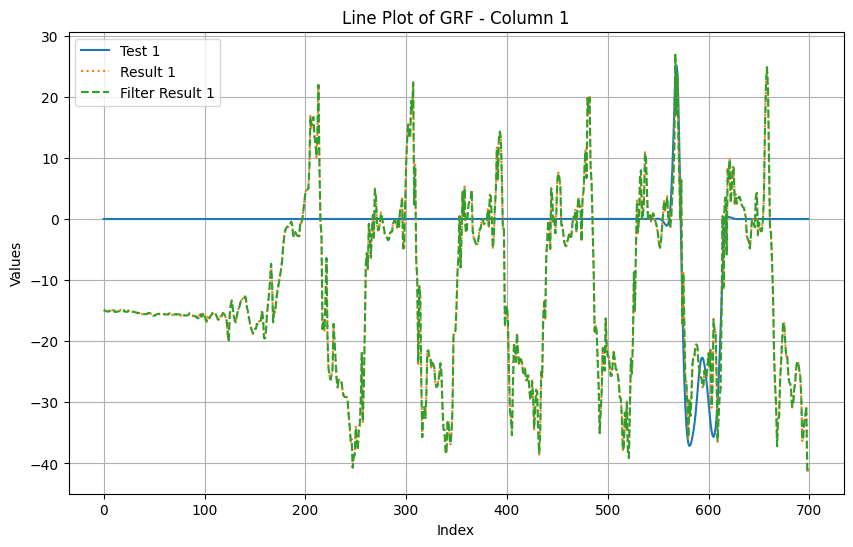

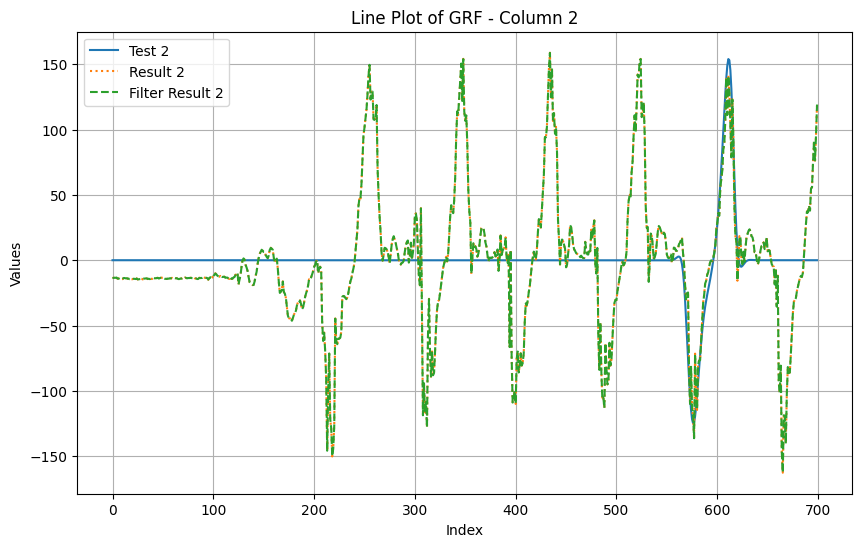

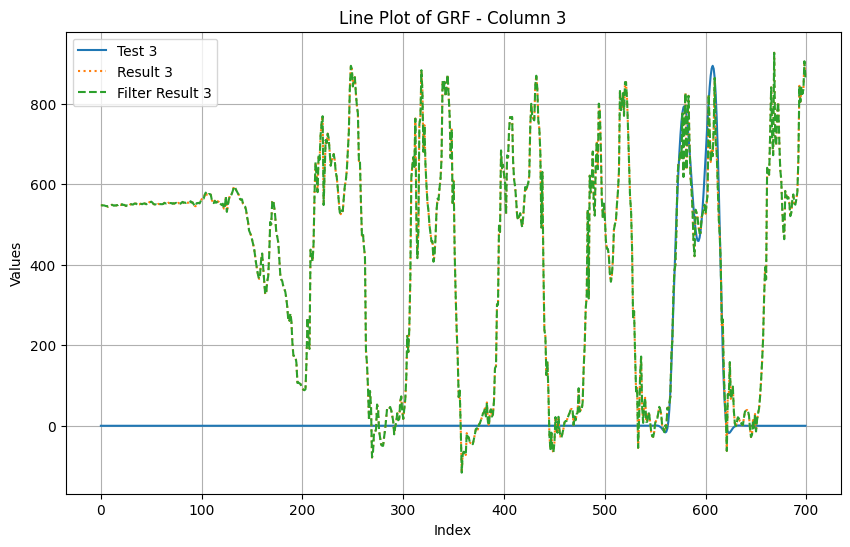

In [30]:
# Assuming y_test and predictions are already defined and are 2D NumPy arrays

min_window = 0
max_window = 700

# Loop over the number of columns
for i in range(y_test.shape[1]):
    plt.figure(figsize=(10, 6))  # Create a new figure for each column
    
    # Plot the test data
    plt.plot(y_test.iloc[min_window:max_window, i], label=f'Test {i+1}')  # Original test data
    
    # Plot the predictions
    plt.plot(predictions[min_window:max_window, i], label=f'Result {i+1}', linestyle=':')  # Predictions
    
    # Optional: Uncomment the next line if you have filtered predictions
    plt.plot(predictions_filtered[min_window:max_window, i], label=f'Filter Result {i+1}', linestyle='--')  # Filtered predictions
    
    # Adding titles and labels
    plt.title(f'Line Plot of GRF - Column {i+1}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    # plt.yscale('log')  # Optional: Use logarithmic scale for better visibility of small values
    
    plt.show()  # Show the figure for the current column

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


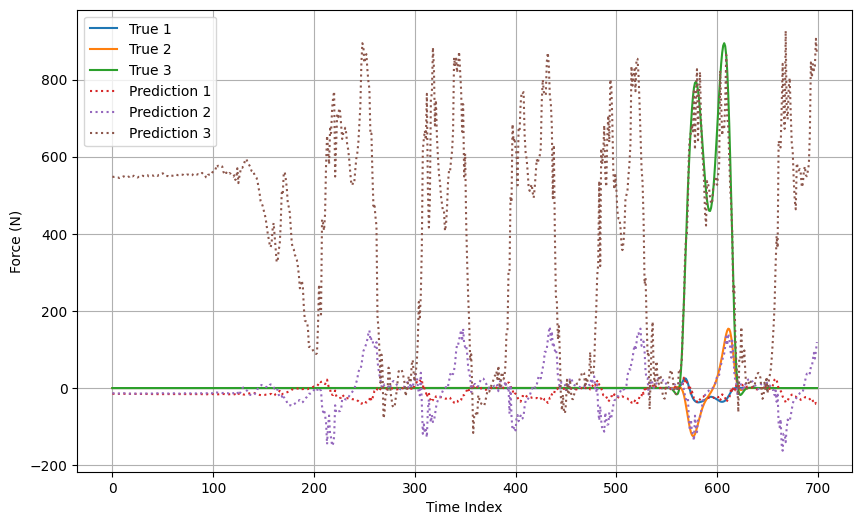

In [31]:
# Plotting the DataFrame
plt.figure(figsize=(10, 6))

for i in range(y_test.shape[1]):  # Loop over the number of columns
    plt.plot(y_test.iloc[min_window:max_window, i], label=f'True {i+1}')  # Use marker for visibility

# Plot each column as a separate line
for i in range(predictions.shape[1]):  # Loop over the number of columns
    # plt.plot(predictions[min_window:max_window, i], label=f'Result {i+1}', linestyle=':')  # Use marker for visibility
    plt.plot(predictions_filtered[min_window:max_window, i], label=f'Prediction {i+1}', linestyle=':')  # Use marker for visibility

# Adding titles and labels
# plt.title('Line Plot of GRF')
plt.xlabel('Time Index')
plt.ylabel('Force (N)')
plt.legend()
plt.grid()
# plt.yscale('log')  # Optional: Use logarithmic scale for better visibility of small values
plt.savefig(os.path.join(results_dir,f'prediction_results_01_l_comf.eps'), format='eps')  # Save as EPS
plt.show()

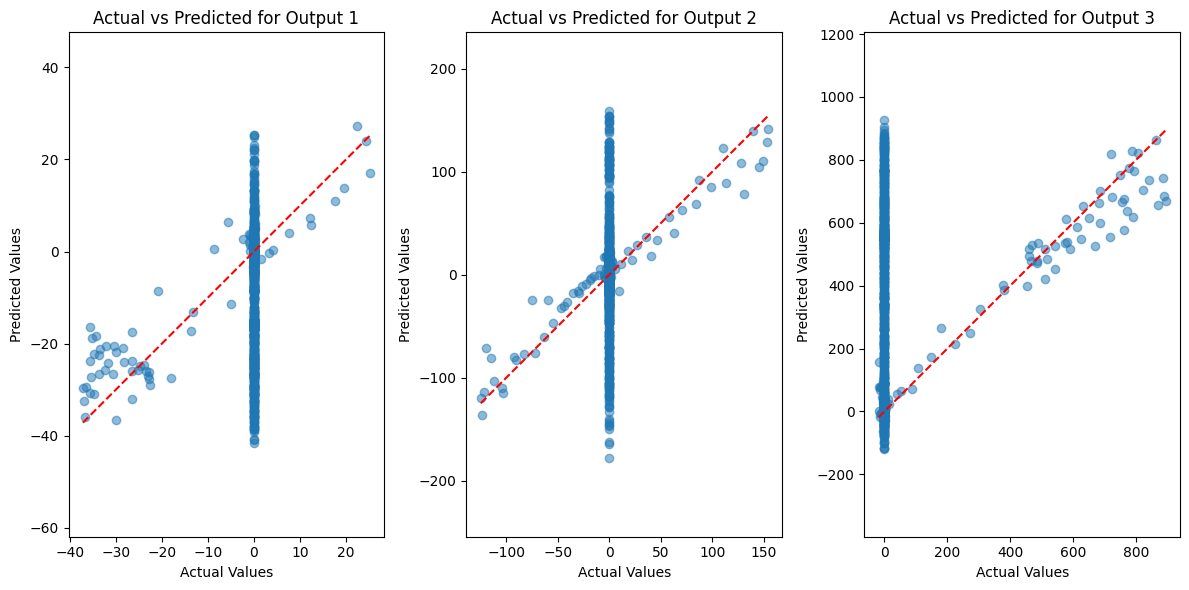

In [32]:
# Create a figure
plt.figure(figsize=(12, 6))
actual_values = y_test
predicted_values = predictions

# Plot actual vs predicted for each output (x, y, z)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(actual_values.iloc[:, i], predicted_values[:, i], alpha=0.5)
    plt.plot([actual_values.iloc[:, i].min(), actual_values.iloc[:, i].max()],
             [actual_values.iloc[:, i].min(), actual_values.iloc[:, i].max()], 'r--')  # Diagonal line
    plt.title(f'Actual vs Predicted for Output {i+1}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.axis('equal')

plt.tight_layout()
plt.show()